## Seaborn
### 用高级命令为统计数据探索和统计模型拟合创建各种图形
（所有图形均可用matplotlib实现，但Seaborn API更方便）
- 频次直方图、KDE和密度图
- 矩阵图（pair plot）
- 分面频次直方图
- 因子图
- 联合分布
- 条形图

### 一、基本图形的绘制实例

#### 1.频次直方图、KDE和密度图

- KDE:核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征.

- distplot:集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途.

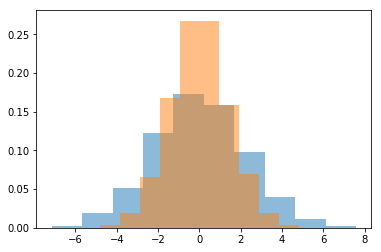

In [14]:
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.multivariate_normal([0, 0],[[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

## 频次直方图
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

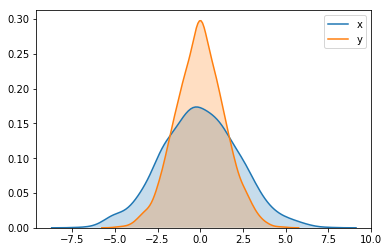

In [15]:
## KDE
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

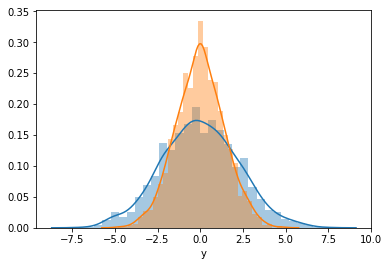

In [16]:
## distplot:让频次直方图和KDE结合起来
sns.distplot(data['x'])
sns.distplot(data['y']);

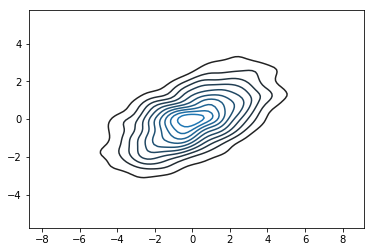

In [17]:
## 二维
sns.kdeplot(data);

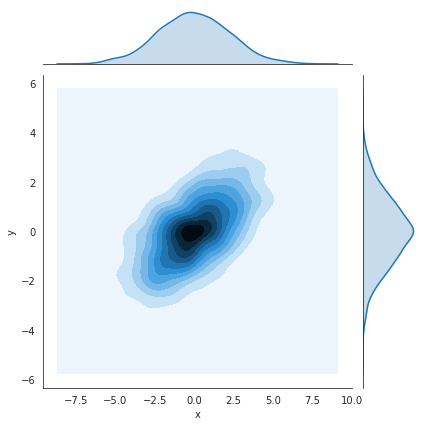

In [18]:
## 联合分布和独立分布jointplot
### 白色背景
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde')

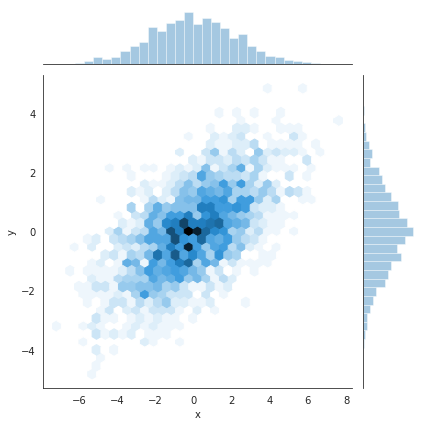

In [19]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

#### 2.矩阵图
对多维数据集进行可视化，画出所以变量中任意两变量之间的图形

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


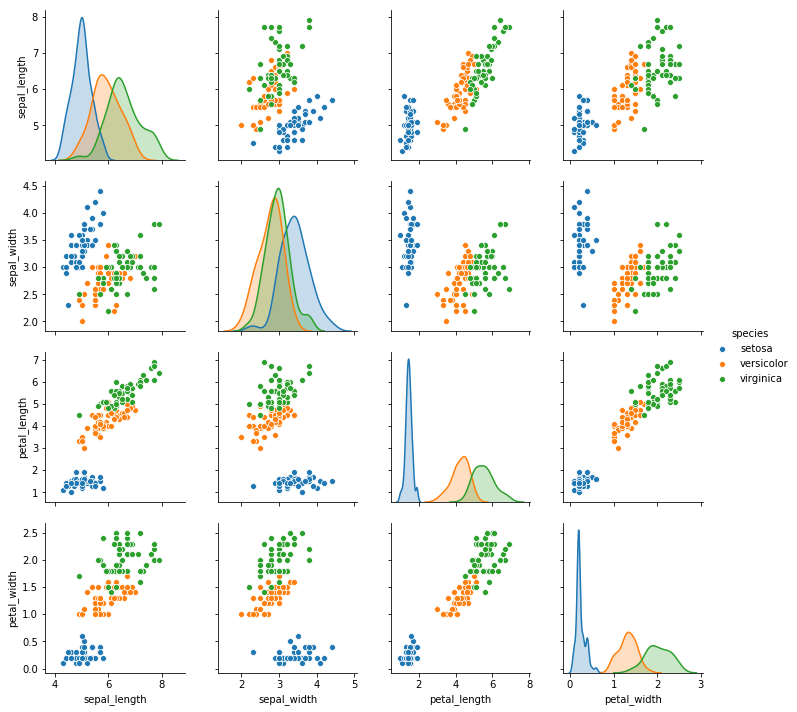

In [21]:
sns.pairplot(iris, hue='species', size=2.5)

#### 3.分面频次直方图
数据子集的频次直方图可视化

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


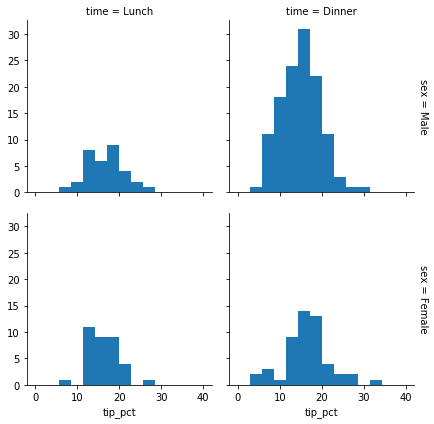

In [23]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#### 4.因子图
因子图（factor plot）
也是对数据子集可视化的方法：观察一个参数在另一个参数间隔中的分布情况

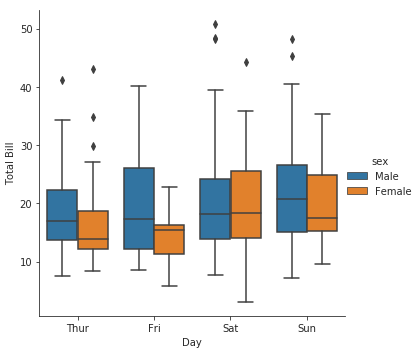

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill","sex",data=tips,kind="box")
    g.set_axis_labels("Day","Total Bill");

#### 5.联合分布
用sns.jointplot画不同数据集的联合分布和数据本身的分布

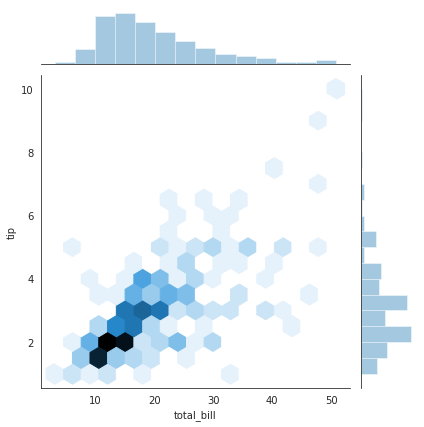

In [26]:
with sns.axes_style('white'):
    sns.jointplot("total_bill","tip",data=tips,kind='hex')

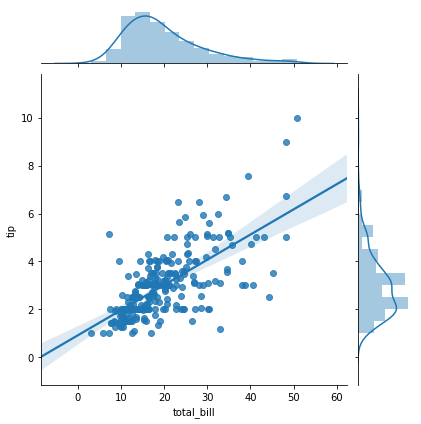

In [29]:
## 自动进行KDE和回归
sns.jointplot("total_bill","tip",data=tips,kind='reg')

#### 6.条形图
主要用于时间序列的统计

In [31]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


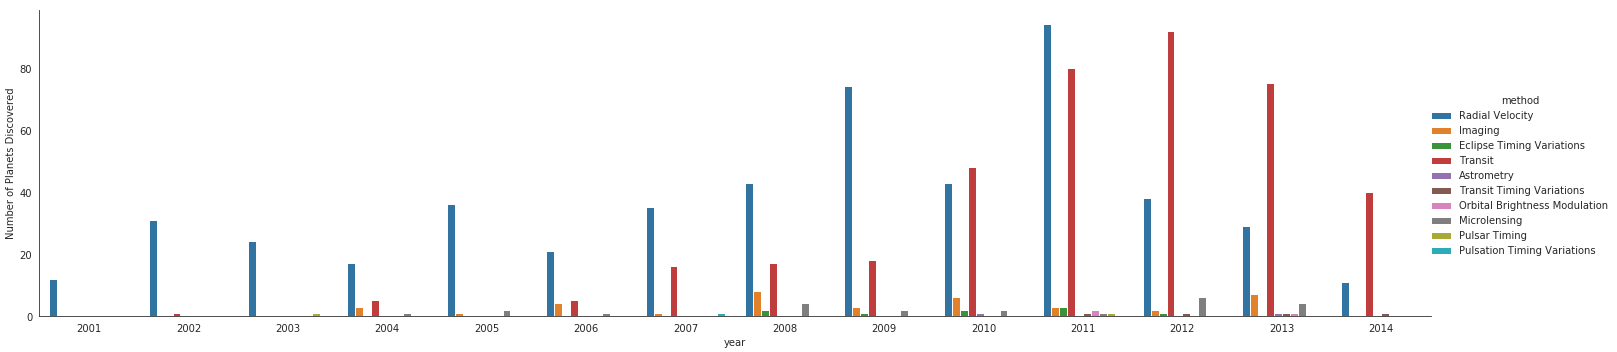

In [32]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',hue='method',order=range(2001,2015))
    g.set_ylabels('Number of Planets Discovered')

本篇《Python数据科学手册》的学习笔记

更多补充内容：（转载）优秀博客：https://www.cnblogs.com/cecilia-2019/p/11368248.html